In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import stats
 


In [44]:
file_path = "IPL_DATASET.xlsx"

batting_df = pd.read_excel(file_path, sheet_name="BATTING DATA")
bowling_df = pd.read_excel(file_path, sheet_name="BOWLING DATA")
match_results_df = pd.read_excel(file_path, sheet_name="MATCH RESULTS")

In [45]:
print("Batting Data : ")
print(batting_df.info())
print(batting_df.head())

Batting Data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16632 entries, 0 to 16631
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Match_ID     16632 non-null  object
 1   Season       16632 non-null  int64 
 2   Team         16632 non-null  object
 3   Batter       16632 non-null  object
 4   Runs         16632 non-null  int64 
 5   Balls_Faced  16632 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 779.8+ KB
None
       Match_ID  Season                         Team         Batter  Runs  \
0  1082591.json    2017  Royal Challengers Bangalore    A Choudhary     6   
1  1082591.json    2017  Royal Challengers Bangalore       CH Gayle    32   
2  1082591.json    2017  Royal Challengers Bangalore      KM Jadhav    31   
3  1082591.json    2017  Royal Challengers Bangalore  Mandeep Singh    24   
4  1082591.json    2017  Royal Challengers Bangalore      S Aravind     0   

   Balls_Faced  
0          

In [46]:
print("Bowling Data : ")
print(bowling_df.info())
print(bowling_df.head())

Bowling Data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13064 entries, 0 to 13063
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Match_ID       13064 non-null  object
 1   Season         13064 non-null  int64 
 2   Bowling Team   13064 non-null  object
 3   Bowler         13064 non-null  object
 4   Runs_Conceded  13064 non-null  int64 
 5   Balls_Bowled   13064 non-null  int64 
 6   Dismissals     13064 non-null  int64 
 7   Bowled         13064 non-null  int64 
 8   Caught         13064 non-null  int64 
 9   LBW            13064 non-null  int64 
 10  Stumped        13064 non-null  int64 
 11  Run_Out        13064 non-null  int64 
 12  Hit_Wicket     13064 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None
       Match_ID  Season                 Bowling Team       Bowler  \
0  1082591.json    2017  Royal Challengers Bangalore  A Choudhary   
1  1082591.json    2017  Royal Chall

In [47]:
print("Match Results : ")
print(match_results_df.info())
print(match_results_df.head())

Match Results : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Match_ID         1102 non-null   object
 1   Season           1102 non-null   int64 
 2   Venue            1102 non-null   object
 3   Team_1           1102 non-null   object
 4   Team_2           1102 non-null   object
 5   Toss_Winner      1102 non-null   object
 6   Toss_Decision    1102 non-null   object
 7   Match_Winner     1102 non-null   object
 8   Opponent_Team    1102 non-null   object
 9   Player_of_Match  1102 non-null   object
dtypes: int64(1), object(9)
memory usage: 86.2+ KB
None
       Match_ID  Season                                          Venue  \
0  1082591.json    2017      Rajiv Gandhi International Stadium, Uppal   
1  1082592.json    2017  Maharashtra Cricket Association Stadium, Pune   
2  1082593.json    2017         Saurashtra Cricket Associa

In [48]:
# Confirming missing values in the sheets

print("Missing values in the batting data : ")
print(batting_df.isnull().sum())
print()

print('Missing values in the bowling data : ')
print(bowling_df.isnull().sum())
print()

print("Missing values in the match results data : ")
print(match_results_df.isnull().sum())
print()

Missing values in the batting data : 
Match_ID       0
Season         0
Team           0
Batter         0
Runs           0
Balls_Faced    0
dtype: int64

Missing values in the bowling data : 
Match_ID         0
Season           0
Bowling Team     0
Bowler           0
Runs_Conceded    0
Balls_Bowled     0
Dismissals       0
Bowled           0
Caught           0
LBW              0
Stumped          0
Run_Out          0
Hit_Wicket       0
dtype: int64

Missing values in the match results data : 
Match_ID           0
Season             0
Venue              0
Team_1             0
Team_2             0
Toss_Winner        0
Toss_Decision      0
Match_Winner       0
Opponent_Team      0
Player_of_Match    0
dtype: int64



In [49]:
# Searching for duplicates in the data

print("Duplicates in Batting Data:", batting_df.duplicated().sum())
print("Duplicates in Bowling Data:", bowling_df.duplicated().sum())
print("Duplicates in Match Data:", match_results_df.duplicated().sum())

Duplicates in Batting Data: 0
Duplicates in Bowling Data: 0
Duplicates in Match Data: 0


In [50]:
# Normalizing Column Names

batting_df.columns = batting_df.columns.str.strip().str.replace(" ","_")
bowling_df.columns = bowling_df.columns.str.strip().str.replace(" ","_")
match_results_df.columns = match_results_df.columns.str.strip().str.replace(" ","_")

In [51]:
# Feature Engineering
# Adding Columns of signifance for further objectives

batting_df['Strike_Rate'] = np.where(
    batting_df['Balls_Faced'] > 0,
    (batting_df['Runs'] / batting_df['Balls_Faced']) * 100,
    0
)


In [52]:
bowling_df['Economy'] = np.where(
    bowling_df['Balls_Bowled'] > 0, 
    (bowling_df['Runs_Conceded'] / (bowling_df['Balls_Bowled'] / 6)),
    0
)


bowling_df['Bowling_Strike_Rate'] = np.where(
    bowling_df['Dismissals'] > 0,
    (bowling_df['Balls_Bowled'] / bowling_df['Dismissals']),
    np.nan
)


In [53]:
bowling_df

,Match_ID,Season,Bowling_Team,Bowler,Runs_Conceded,Balls_Bowled,Dismissals,Bowled,Caught,LBW,Stumped,Run_Out,Hit_Wicket,Economy,Bowling_Strike_Rate
0,1082591.json,2017,Royal Challengers Bangalore,A Choudhary,55,28,1,0,1,0,0,0,0,11.785714,28.0
1,1082591.json,2017,Royal Challengers Bangalore,S Aravind,36,18,0,0,0,0,0,0,0,12.000000,NaN
2,1082591.json,2017,Royal Challengers Bangalore,SR Watson,41,18,0,0,0,0,0,0,0,13.666667,NaN
3,1082591.json,2017,Royal Challengers Bangalore,STR Binny,10,6,1,0,1,0,0,0,0,10.000000,6.0
4,1082591.json,2017,Royal Challengers Bangalore,TM Head,11,6,0,0,0,0,0,0,0,11.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13059,981019.json,2016,Sunrisers Hyderabad,BB Sran,41,20,1,1,0,0,0,0,0,12.300000,20.0
13060,981019.json,2016,Sunrisers Hyderabad,BCJ Cutting,35,25,2,1,1,0,0,0,0,8.400000,12.5
13061,981019.json,2016,Sunrisers Hyderabad,Bipul Sharma,17,12,1,0,1,0,0,0,0,8.500000,12.0
13062,981019.json,2016,Sunrisers Hyderabad,MC Henriques,40,18,0,0,0,0,0,0,0,13.333333,NaN


In [54]:
# General Trends

batting_integers = batting_df[['Runs','Balls_Faced','Strike_Rate']]
bowling_integers = bowling_df[['Runs_Conceded','Balls_Bowled','Economy','Bowling_Strike_Rate']]


print(bowling_integers.describe(),"\n")
print(bowling_integers.describe())

       Runs_Conceded  Balls_Bowled       Economy  Bowling_Strike_Rate
count   13064.000000  13064.000000  13064.000000          7832.000000
mean       26.831751     20.102189      8.297804            16.230733
std        11.088111      6.434797      3.036139             7.063735
min         0.000000      1.000000      0.000000             1.000000
25%        19.000000     18.000000      6.240000            12.000000
50%        26.000000     24.000000      8.000000            13.000000
75%        34.000000     25.000000     10.000000            24.000000
max        80.000000     34.000000     36.000000            32.000000

 

       Runs_Conceded  Balls_Bowled       Economy  Bowling_Strike_Rate
count   13064.000000  13064.000000  13064.000000          7832.000000
mean       26.831751     20.102189      8.297804            16.230733
std        11.088111      6.434797      3.036139             7.063735
min         0.000000      1.000000      0.000000             1.000000
25%        19.000000     18.000000      6.240000            12.000000
50%        26.000000     24.000000      8.000000            13.000000
75%        34.000000     25.000000     10.000000            24.000000
max        80.000000     34.000000     36.000000            32.000000


In [55]:
batting_corr = batting_integers.corr()
print(f"Batting Correlation:\n {batting_corr}")
print("---------------------")
bowling_corr = bowling_integers.corr()
print(f"Bowling Correlation:\n {bowling_corr}")

Batting Correlation:
                  Runs  Balls_Faced  Strike_Rate
Runs         1.000000     0.929033     0.494274
Balls_Faced  0.929033     1.000000     0.295278
Strike_Rate  0.494274     0.295278     1.000000
---------------------
Bowling Correlation:
                      Runs_Conceded  Balls_Bowled   Economy  \
Runs_Conceded             1.000000      0.626887  0.472280   
Balls_Bowled              0.626887      1.000000 -0.297588   
Economy                   0.472280     -0.297588  1.000000   
Bowling_Strike_Rate       0.356511      0.357139  0.153645   

                     Bowling_Strike_Rate  
Runs_Conceded                   0.356511  
Balls_Bowled                    0.357139  
Economy                         0.153645  
Bowling_Strike_Rate             1.000000  


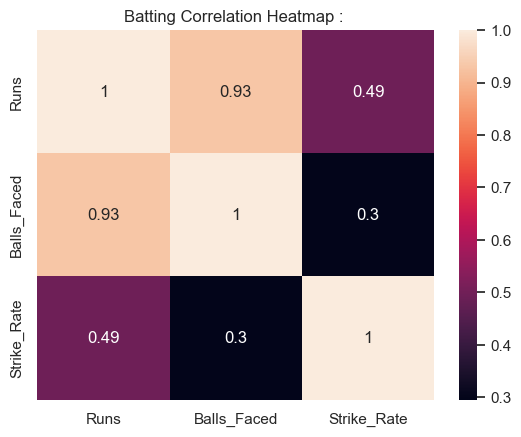

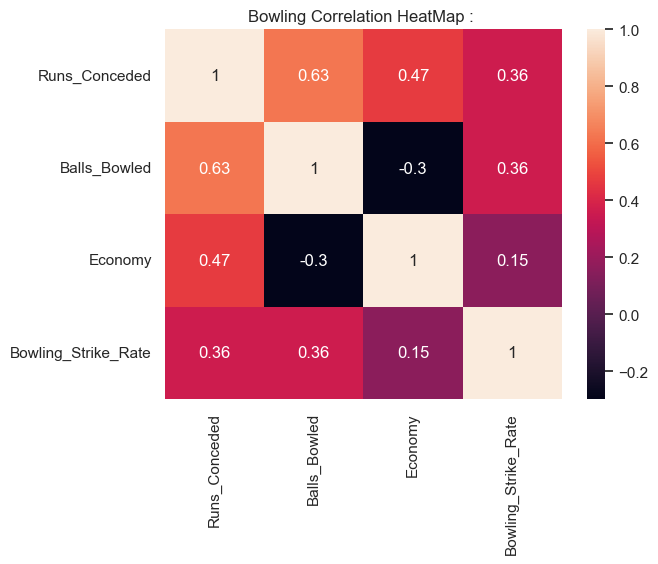

In [56]:
sns.heatmap(batting_corr , annot = True , cmap = "rocket")
plt.title("Batting Correlation Heatmap : ")
plt.show()


sns.heatmap(bowling_corr , annot = True,  cmap = 'rocket')
plt.title("Bowling Correlation HeatMap : ")
plt.show()

In [57]:
## outlier detection

# sns.set(style = "whitegrid")

# plt.figure(figsize = (15,5))

# for i , col in enumerate(batting_integers , 1):
#     plt.subplot(1,3,i)
#     sns.boxplot(x = batting_df[col],color = "skyblue")
#     plt.title(f"Boxplot of {col}")

# plt.tight_layout()
# plt.show()

In [58]:
# Bowling Boxplots

# plt.figure(figsize=(18, 4))
# for i, col in enumerate(bowling_integers, 1):
#     plt.subplot(1, 4, i)
#     sns.boxplot(x=bowling_df[col], color="lightcoral")
#     plt.title(f'Boxplot of {col}')
# plt.tight_layout()
# plt.show()


In [59]:
#Objectivessss

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3404\848669495.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_ten_run_scorers , y = "Batter", x = "Runs",palette = 'viridis')


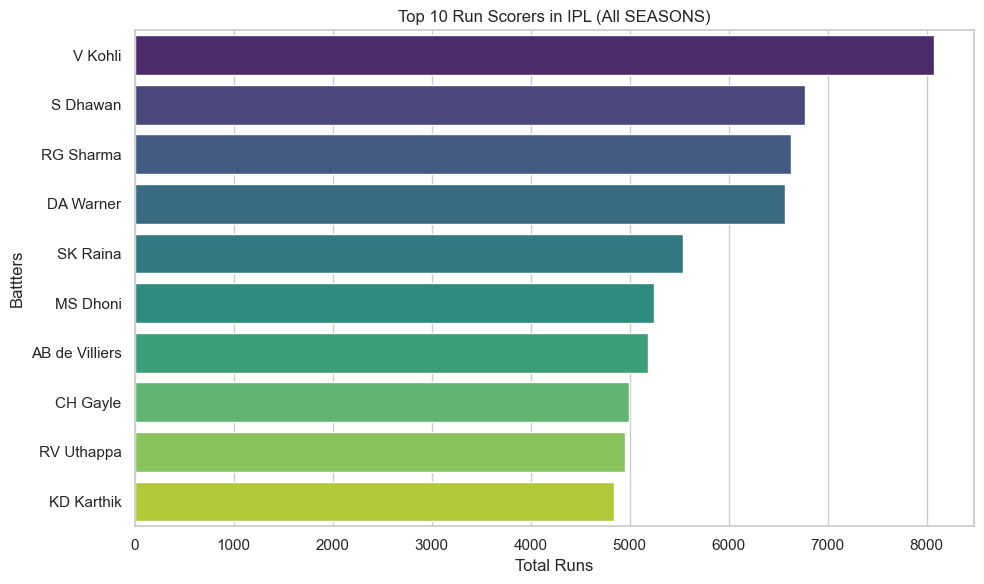

In [60]:
top_run_scorers = (
    batting_df.groupby('Batter',as_index = False)
    .agg({"Runs":"sum"})
    .sort_values("Runs",ascending = False)
)


top_ten_run_scorers = top_run_scorers.head(10)

plt.figure(figsize = (10,6))
sns.barplot(data = top_ten_run_scorers , y = "Batter", x = "Runs",palette = 'viridis')
plt.title("Top 10 Run Scorers in IPL (All SEASONS)")
plt.xlabel("Total Runs")
plt.ylabel("Battters")
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3404\1707128321.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


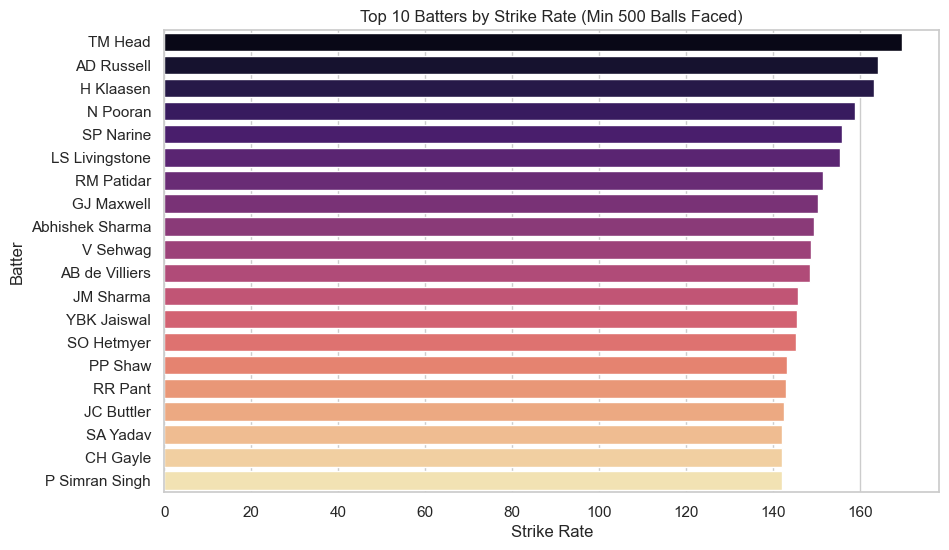

In [61]:
## OBJECTIVE

career_stats = (
    batting_df.groupby("Batter")
    .agg({
        'Runs':'sum',
        'Balls_Faced':'sum'
    })
)

career_stats = career_stats[career_stats['Balls_Faced'] >=  500]
career_stats['Strike_Rate'] = (career_stats['Runs'] / career_stats['Balls_Faced']) * 100

career_strike_rate_top = career_stats.sort_values('Strike_Rate',ascending = False).head(20)


plt.figure(figsize=(10,6))
sns.barplot(
    data = career_strike_rate_top,
    x = 'Strike_Rate',
    y = 'Batter',
    palette = 'magma'
)
plt.title("Top 10 Batters by Strike Rate (Min 500 Balls Faced)")
plt.xlabel("Strike Rate")
plt.ylabel("Batter")
# plt.tight_layout()
plt.show()

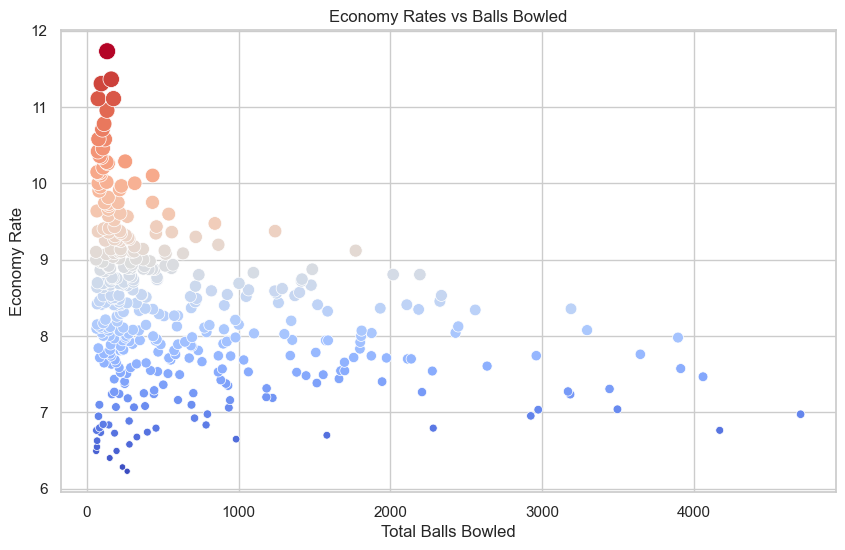

In [62]:
## objective

bowler_stats = (
    bowling_df.groupby('Bowler', as_index=False)
    .agg({
        'Runs_Conceded':'sum',
        'Balls_Bowled' : 'sum'
    })
)

bowler_stats = bowler_stats[bowler_stats['Balls_Bowled'] >= 60]

bowler_stats['Economy'] = (bowler_stats['Runs_Conceded'] / (bowler_stats['Balls_Bowled'] / 6))


plt.figure(figsize = (10,6))
sns.scatterplot(
    data = bowler_stats.sort_values("Economy",ascending=True),
    x = 'Balls_Bowled',
    y = 'Economy',
    hue = 'Economy',
    palette = 'coolwarm',
    size = 'Economy',
    sizes = (20,150)
)
plt.title("Economy Rates vs Balls Bowled")
plt.xlabel("Total Balls Bowled")
plt.ylabel("Economy Rate")
plt.legend([],[],frameon = False)
plt.show()


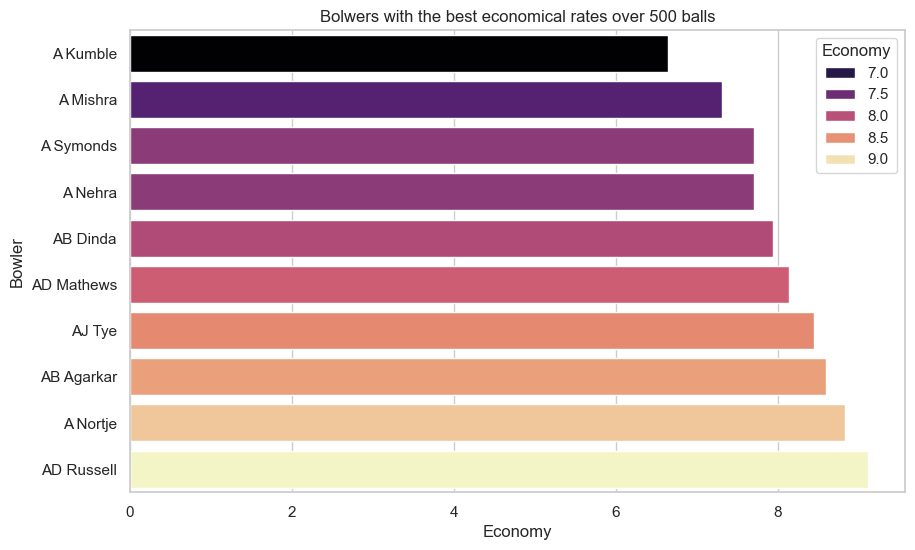

In [63]:
# Objective

reliable_bowler = bowler_stats[bowler_stats['Balls_Bowled'] >= 500].head(10)
most_economical_bowlers = reliable_bowler.sort_values("Economy",ascending=True)


plt.figure(figsize=(10,6))
sns.barplot(
    data = most_economical_bowlers,
    x = 'Economy',
    y = 'Bowler',
    palette = 'magma',
    hue = 'Economy'
)
plt.title("Bolwers with the best economical rates over 500 balls")
plt.xlabel("Economy")
plt.ylabel("Bowler")
# plt.tight_layout()
plt.show()

In [64]:
## objective

valid_dismissals = ['Bowled','Caught','LBW','Stumped','Run_Out']
dismissal_by_type = bowling_df.groupby('Bowler')[valid_dismissals].sum().sort_values(by = 'Bowled',ascending = False)

for dtype in dismissal_by_type:
    print(f"Top Bowlers by {dtype}")
    print(dismissal_by_type.sort_values(by=dtype,ascending = False)[[dtype]].head(10))
    print()

Top Bowlers by Bowled
                Bowled
Bowler                
SL Malinga          63
PP Chawla           50
SP Narine           50
JJ Bumrah           39
RA Jadeja           39
B Kumar             39
Rashid Khan         38
YS Chahal           36
AR Patel            34
Mohammed Shami      30

Top Bowlers by Caught
           Caught
Bowler           
DJ Bravo      143
YS Chahal     127
B Kumar       122
R Ashwin      118
HV Patel      110
UT Yadav      108
JJ Bumrah     108
A Mishra      102
MM Sharma     102
K Rabada       98

Top Bowlers by LBW
                LBW
Bowler             
Rashid Khan      35
SP Narine        25
PP Chawla        21
R Ashwin         19
YS Chahal        18
JJ Bumrah        17
RA Jadeja        15
Sandeep Sharma   15
A Mishra         14
TA Boult         12

Top Bowlers by Stumped
                 Stumped
Bowler                  
A Mishra              28
YS Chahal             20
PP Chawla             19
Harbhajan Singh       18
PP Ojha               12
RA J

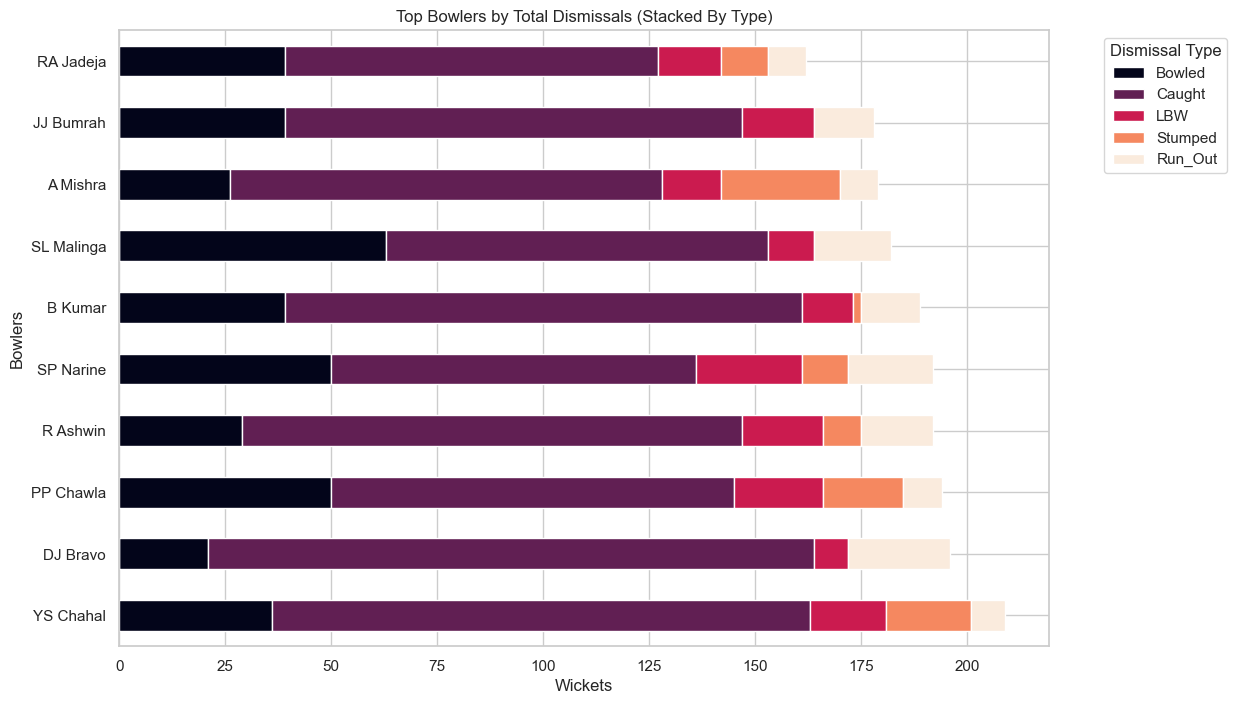

In [65]:
dismissal_by_type['Total'] = dismissal_by_type.sum(axis = 1)
top_bowlers = dismissal_by_type.sort_values('Total',ascending = False).head(10)

stacked_df = top_bowlers[valid_dismissals]
stacked_df.plot(kind = 'barh', stacked=True, figsize=(12,8), colormap='rocket')
plt.title("Top Bowlers by Total Dismissals (Stacked By Type)")
plt.xlabel("Wickets")
plt.ylabel("Bowlers")
plt.legend(title='Dismissal Type', bbox_to_anchor = (1.05,1), loc='upper left')
plt.show()

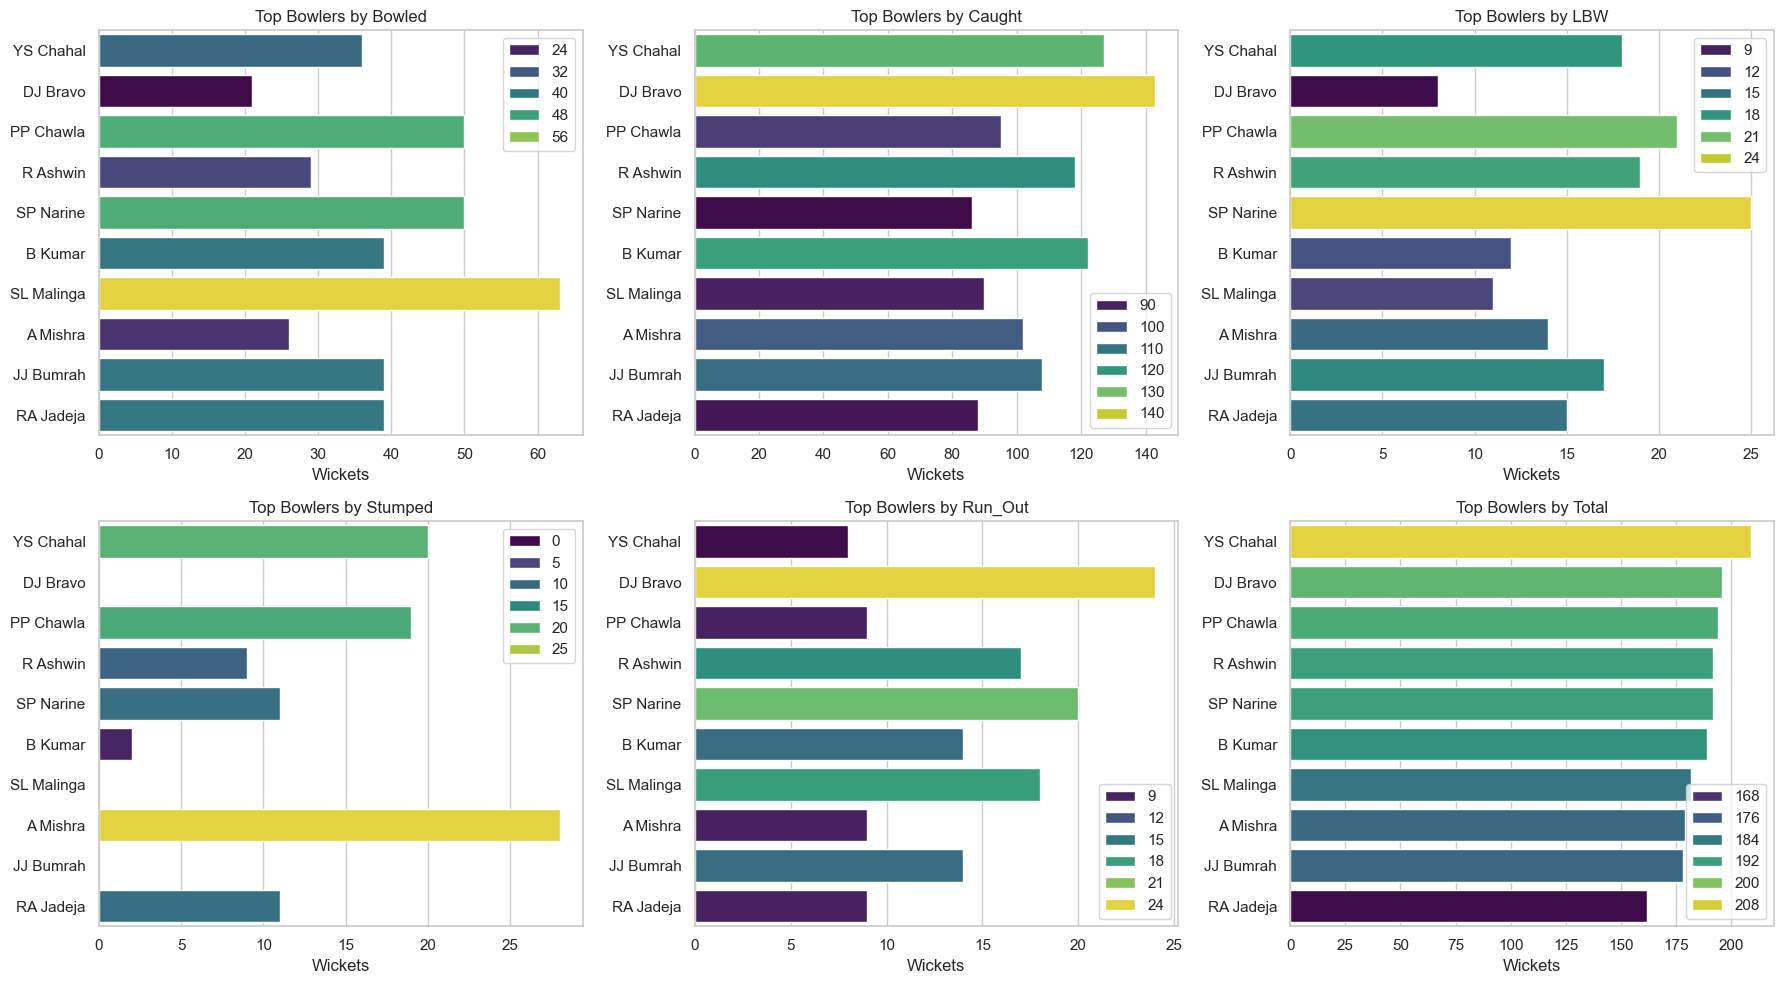

In [66]:

# Set up plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Create bar plots for each dismissal type
for i, dismissal in enumerate(dismissal_by_type):
    sns.barplot(
        x=top_bowlers[dismissal].values,
        y=top_bowlers.index,
        ax=axes[i],
        palette="viridis",
        hue = top_bowlers[dismissal].values
    )
    axes[i].set_title(f"Top Bowlers by {dismissal}")
    axes[i].set_xlabel("Wickets")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


In [67]:
## consistent performers across seasons
batting_df['Season'] = batting_df['Season'].astype(int)
bowling_df['Season'] = bowling_df['Season'].astype(int)


batting_filtered = batting_df[(batting_df['Season'] >= 2015) & (batting_df['Season'] <= 2024)]
bowling_filtered = bowling_df[(bowling_df['Season'] >= 2015) & (bowling_df['Season'] <= 2024)]

batting_consistency = batting_filtered.groupby(["Batter","Season"])['Runs'].sum().reset_index()

batting_matrix = batting_consistency.pivot(index='Batter',columns='Season',values='Runs').fillna(0)

batting_matrix['Total_Runs'] = batting_matrix.sum(axis = 1)
consistent_batter_last_ten_years = batting_matrix.sort_values("Total_Runs",ascending=False).head(10)
print(consistent_batter_last_ten_years)


Season         2015   2016   2017   2018   2019   2020   2021   2022   2023  \
Batter                                                                        
V Kohli       505.0  973.0  308.0  530.0  464.0  471.0  405.0  341.0  639.0   
DA Warner     562.0  848.0  641.0    0.0  692.0  548.0  197.0  432.0  516.0   
S Dhawan      353.0  501.0  479.0  497.0  521.0  618.0  587.0  460.0  373.0   
KL Rahul      142.0  397.0    0.0  659.0  593.0  676.0  626.0  616.0  274.0   
SV Samson     204.0  291.0  386.0  441.0  342.0  375.0  484.0  458.0  362.0   
F du Plessis  380.0  206.0    8.0  162.0  396.0  449.0  633.0  468.0  730.0   
RG Sharma     482.0  489.0  333.0  286.0  405.0  334.0  381.0  268.0  332.0   
JC Buttler      0.0  255.0  273.0  548.0  311.0  328.0  254.0  863.0  392.0   
SA Yadav      157.0  182.0  105.0  512.0  424.0  480.0  317.0  303.0  605.0   
RR Pant         0.0  198.0  366.0  684.0  494.0  345.0  424.0  340.0    0.0   

Season         2024  Total_Runs  
Batter           

In [68]:
#consistent bowlers
bowling_consistency = bowling_filtered.groupby(['Bowler','Season'])['Dismissals'].sum().reset_index()

bowling_matrix = bowling_consistency.pivot(index = 'Bowler',columns='Season',values='Dismissals')
bowling_matrix['Total_Wickets'] = bowling_matrix.sum(axis=1)

consistent_bowler_last_ten_years = bowling_matrix.sort_values("Total_Wickets",ascending=False).head(10)
print(consistent_bowler_last_ten_years)


Season          2015  2016  2017  2018  2019  2020  2021  2022  2023  2024  \
Bowler                                                                       
YS Chahal       24.0  22.0  14.0  12.0  18.0  22.0  19.0  29.0  22.0  19.0   
JJ Bumrah        3.0  18.0  23.0  17.0  23.0  30.0  22.0  16.0   NaN  21.0   
Rashid Khan      NaN   NaN  18.0  23.0  19.0  20.0  19.0  20.0  28.0  10.0   
B Kumar         19.0  24.0  28.0  10.0  14.0   5.0   6.0  13.0  19.0  11.0   
HV Patel        19.0   2.0   3.0   7.0   3.0   3.0  35.0  21.0  15.0  30.0   
Mohammed Shami   NaN   8.0   8.0   3.0  22.0  23.0  20.0  21.0  28.0   NaN   
TA Boult        10.0   1.0   5.0  20.0   5.0  26.0  14.0  18.0  13.0  16.0   
Sandeep Sharma  13.0  19.0  17.0  14.0  13.0  14.0   3.0   3.0  15.0  15.0   
K Rabada         NaN   NaN   8.0   NaN  29.0  32.0  16.0  23.0   7.0  11.0   
SP Narine        7.0  13.0  12.0  17.0  11.0   6.0  18.0  10.0  11.0  18.0   

Season          Total_Wickets  
Bowler                         

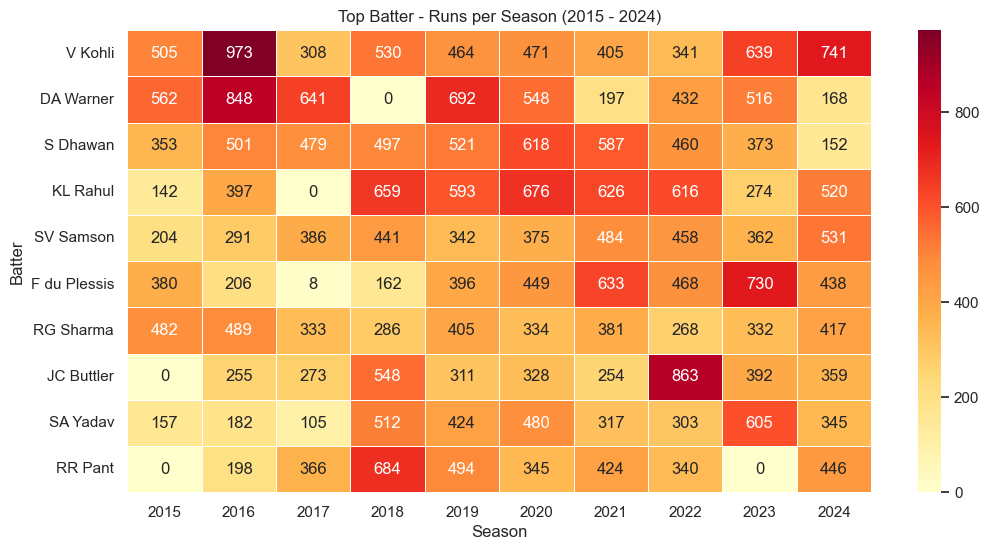

In [69]:
# heatmap for consistent performers
#batters 

plt.figure(figsize=(12,6))
sns.heatmap(consistent_batter_last_ten_years.drop(columns='Total_Runs'),cmap='YlOrRd',annot=True, fmt='.0f',linewidths=0.5)
plt.title("Top Batter - Runs per Season (2015 - 2024)")
plt.xlabel('Season')
plt.ylabel('Batter')
plt.show()

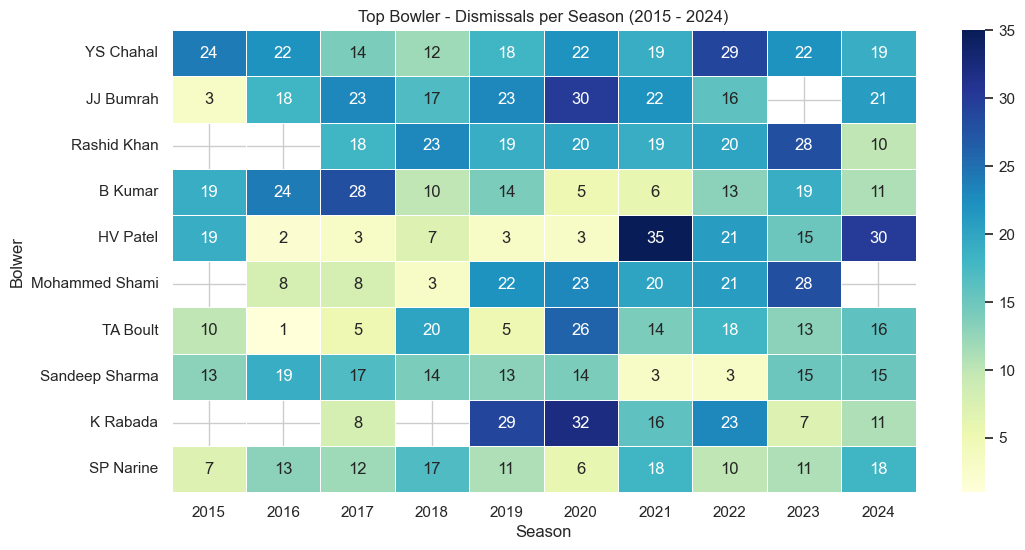

In [70]:
# heatmap for consistent performers
# bowlers

plt.figure(figsize=(12,6))
sns.heatmap(consistent_bowler_last_ten_years.drop(columns='Total_Wickets'),cmap='YlGnBu',annot=True,fmt='.0f',linewidths=0.5)
plt.title("Top Bowler - Dismissals per Season (2015 - 2024)")
plt.xlabel('Season')
plt.ylabel('Bolwer')
plt.show()

Toss_Decision
Field    711
Bat      391
Name: count, dtype: int64


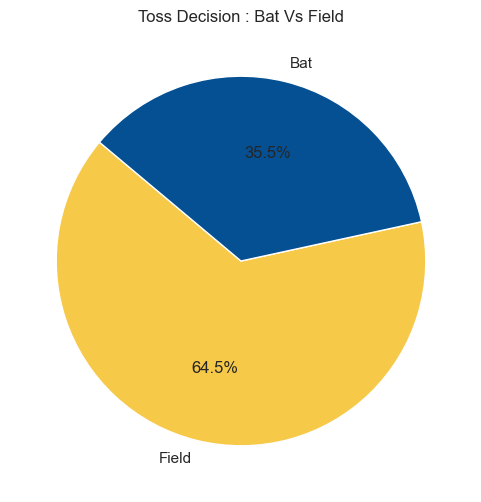

In [71]:
# toss decision

toss_decision_counts = match_results_df['Toss_Decision'].value_counts()
print(toss_decision_counts)

plt.figure(figsize=(6,6))
plt.pie(
    toss_decision_counts.values,
    labels = toss_decision_counts.index,
    autopct='%1.1f%%',
    colors=['#F7C948', '#045093'],
    startangle=140
)
plt.title("Toss Decision : Bat Vs Field")
plt.show()

Toss_Win_Match_Win
Yes    553
No     549
Name: count, dtype: int64


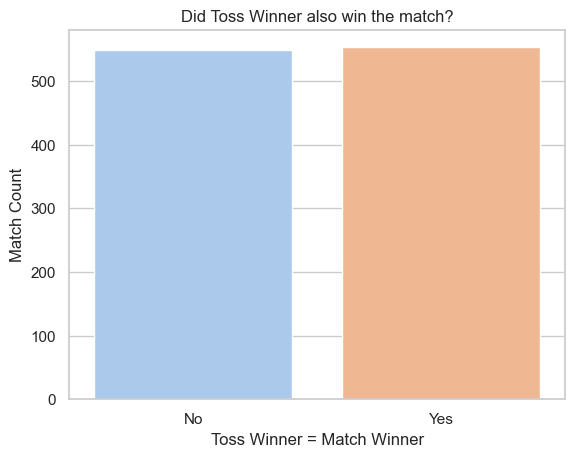

In [73]:
match_results_df['Toss_Win_Match_Win'] = np.where(
    match_results_df['Toss_Winner'] == match_results_df['Match_Winner'],
    'Yes','No'
)

toss_match_outcome = match_results_df['Toss_Win_Match_Win'].value_counts()
print(toss_match_outcome)

sns.countplot(data = match_results_df, x ='Toss_Win_Match_Win',palette='pastel',hue=match_results_df['Toss_Win_Match_Win'])
plt.title("Did Toss Winner also win the match?")
plt.xlabel("Toss Winner = Match Winner")
plt.ylabel("Match Count")
plt.show()

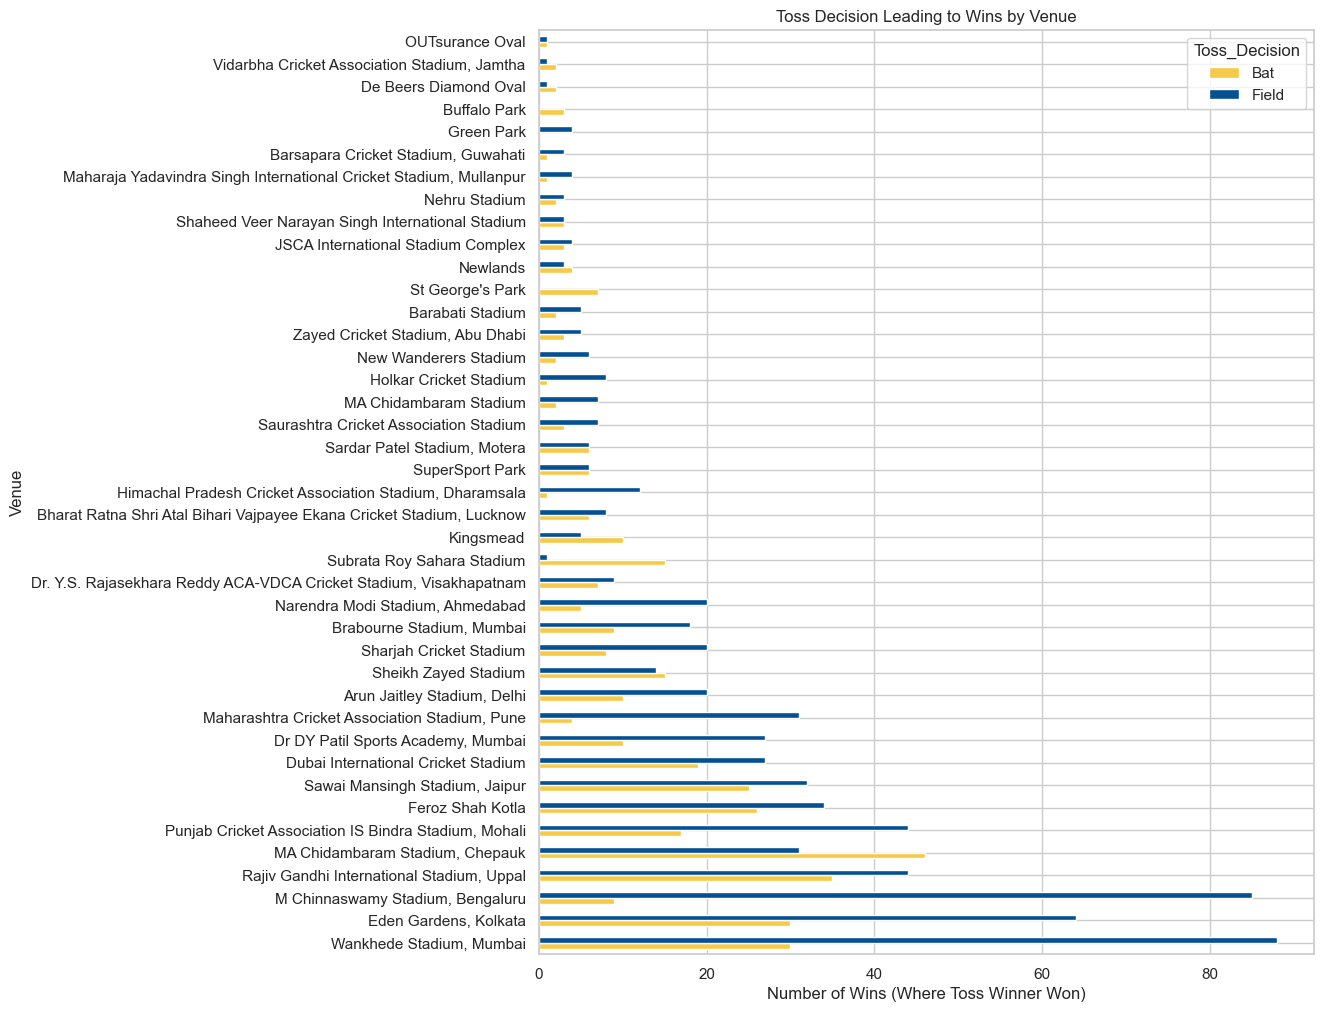

In [ ]:
# Filter matches where toss winner also won the match
toss_win_df = match_results_df[match_results_df['Toss_Winner'] == match_results_df['Match_Winner']]

# using below statement will give toss win picks for all cases
# toss_win_df = match_results_df

venue_decision_win = toss_win_df.groupby(['Venue', 'Toss_Decision'])['Match_ID'].count().reset_index()


venue_decision_pivot = venue_decision_win.pivot(index='Venue', columns='Toss_Decision', values='Match_ID').fillna(0)

venue_decision_pivot['Total'] = venue_decision_pivot.sum(axis=1)
venue_decision_pivot = venue_decision_pivot.sort_values('Total', ascending=False)
venue_decision_pivot.drop(columns='Total', inplace=True)


venue_decision_pivot.plot(
    kind = 'barh',
    figsize=(10,12),
    color={'Bat': '#F7C948', 'Field': '#045093'}
)
plt.title("Toss Decision Leading to Wins by Venue")
plt.xlabel("Number of Wins (Where Toss Winner Won)")
plt.ylabel("Venue")
plt.show()

In [ ]:
#player of the match
pom_count = match_results_df['Player_of_Match'].value_counts().reset_index()
pom_count.columns = ['Player','Awards']

top_pom = pom_count.head(10)
print(top_pom)

           Player  Awards
0  AB de Villiers      25
1        CH Gayle      22
2       RG Sharma      19
3       DA Warner      18
4         V Kohli      18
5        MS Dhoni      17
6       SR Watson      16
7       RA Jadeja      16
8       YK Pathan      16
9      AD Russell      15


pandas.core.frame.DataFrame

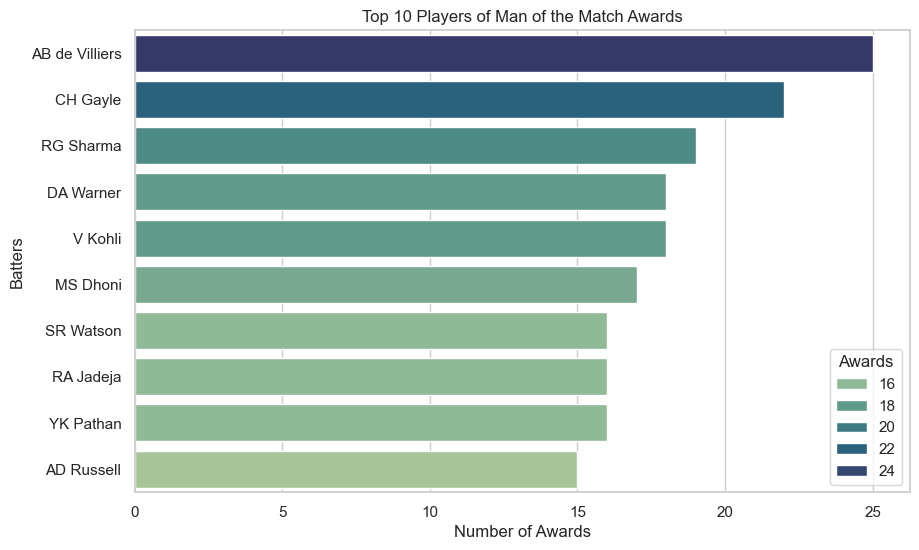

In [112]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_pom, x = 'Awards', y='Player',palette="crest", hue='Awards')
plt.title("Top 10 Players of Man of the Match Awards")
plt.xlabel("Number of Awards")
plt.ylabel("Batters")
plt.show()

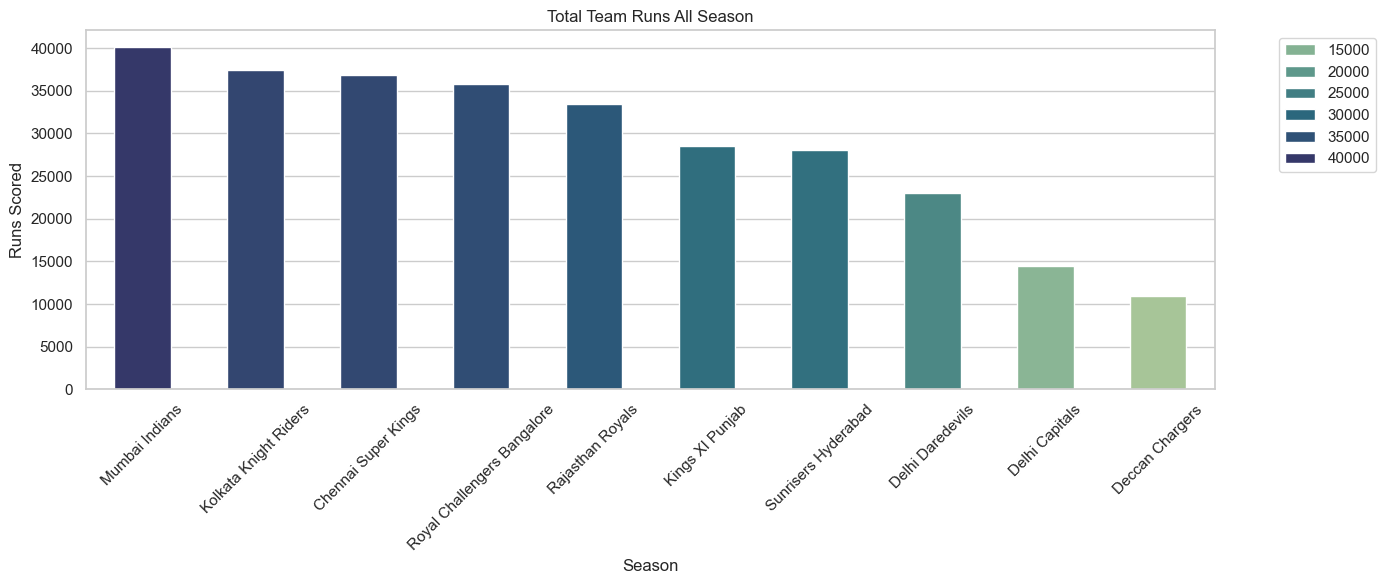

In [130]:
# analysis by team performance for batting and bowling over the years

team_batting = (
    batting_df.groupby(['Team'])['Runs']
    .sum()
    .reset_index()
    .sort_values(by=['Runs'],ascending=[False])
    .head(10)
)

# team_batting_pivot = team_batting.pivot(index='Team',values='Runs').fillna(0)


plt.figure(figsize=(14,6))
sns.barplot(data = team_batting, x = 'Team', y='Runs',palette="crest", hue='Runs',orient='x',width=0.5)
plt.title("Total Team Runs All Season")
plt.ylabel("Runs Scored")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()
# team_batting

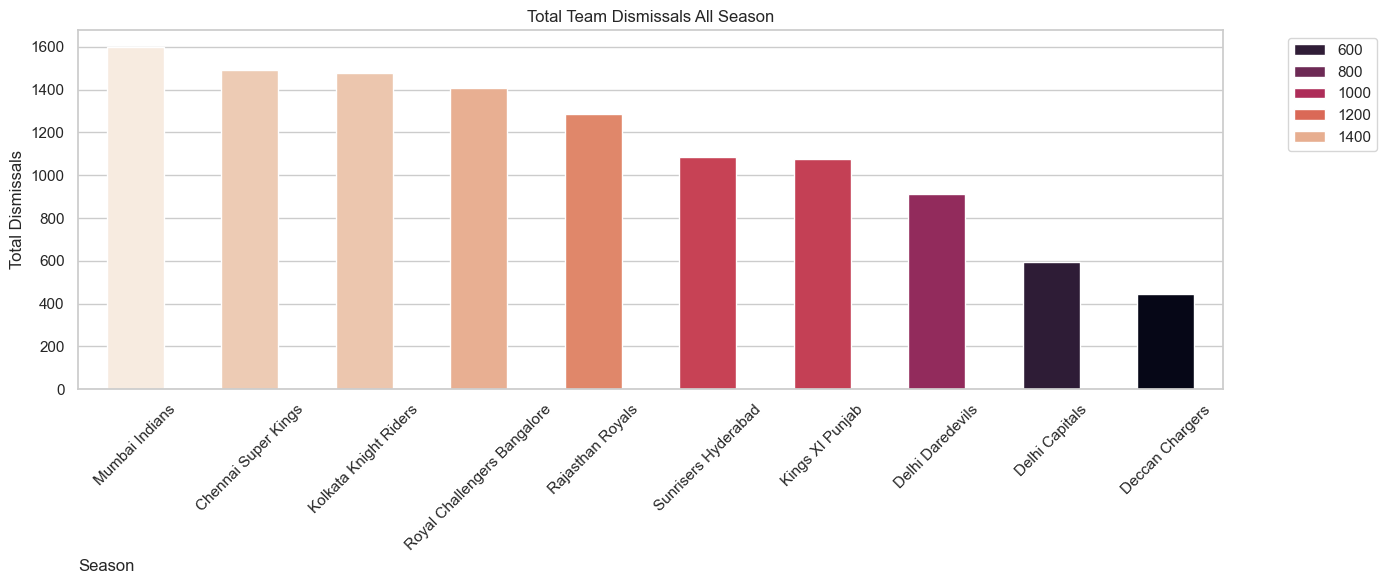

In [129]:
# analysis by team performance for batting and bowling over the years

team_bowling = (
    bowling_df.groupby(['Bowling_Team'])['Dismissals']
    .sum()
    .reset_index()
    .sort_values(by=['Dismissals'],ascending=[False])
    .head(10)
)

# team_batting_pivot = team_batting.pivot(index='Team',values='Runs').fillna(0)


plt.figure(figsize=(14,6))
sns.barplot(data = team_bowling, x = 'Bowling_Team', y='Dismissals',palette="rocket", hue='Dismissals',width=0.5)
plt.title("Total Team Dismissals All Season")
plt.ylabel("Total Dismissals")
plt.xlabel("Season",loc='left')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()
#